### PROJECT OUTLINE
1. Introduction
2. Business Understanding
Business problem
Objectives
3. Data Understanding
4. Data preparation
Data Loading
Data cleaning
Data Analysis
5. Exploratory Descriptive Analysis (EDA)
Translating data into visual context
Plotting of graphs.
6. Conclusion
7. Recommendations

# MOVIE ANALYSIS
## Project Overview
### Business Understanding

Microsoft is looking to venture into the movie business as its the in thing with major companies. They want to be provided for an analysis that will help them also be big in box office. As the Data scientist handling the project i will be working with data to provide the best insights so as to ensure greater return.


#### Objectives
Provide insights about the movie industry to make the right choices.

#### Questions to answer



* Which genre has the highest ratings
* Which genre has highest worlwide gross
* Does Budget of movie affect gross income
* Which studio produces highest rated movies/ most movies



### Data Understanding 
Data sources for this project include IMDB database and various csv files and tsv files.
1. bom.movies_gross.csv
2. tn.movie_budgets.csv
3. tmdb.movies.csv
4. rt.reviews.tsv
5. rt.movie_info

This datasets were extracted through the following sites
* Box Office.
* IMDB.
* Rotten Tomatoes.
* TheMovieDB.
* The Numbers


#### Importing relevant libraries

In [3]:
# importing relevant libraries
import pandas as pd
import numpy as np
import sqlite3 


import matplotlib.pyplot as plt
import seaborn as sns


### Data Preparation
#### Connecting to im.db database

In [4]:
# connecting to the im.db database
conn = sqlite3.connect("im.db")
conn

#### Reading the database tables

In [5]:
# conecting to movie_basics table
movie_basics = pd.read_sql(""" SELECT *
                           FROM movie_basics
""", conn)
movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
# connecting to movie_ratings
movie_ratings = pd.read_sql(""" SELECT *
                           FROM movie_ratings
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5



#### Reading the csv datasets

In [7]:
movie_gross = pd.read_csv('bom.movie_gross.csv', sep = ',')
movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
movie_budget = pd.read_csv('tn.movie_budgets.csv', sep = ',', index_col=0)
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [9]:
movie_info = pd.read_csv('rt.movie_info.tsv', sep = "\t", index_col=0)
movie_info

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [10]:
tmdb_movie = pd.read_csv('tmdb.movies.csv', sep = ',', index_col=0)
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## DATA ANALYSIS


#### The datasets i will be working with are:
*

### DATA CLEANING

##### 1. Movie Gross DF

In [11]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
# preview of missing values
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
# To remove missing rows in the foreign column
movie_gross.dropna(subset = ['foreign_gross'], inplace = True)
# to check if ive dropped the missing rows
movie_gross.isna().sum()

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [15]:
# To remove missing rows in domestic gross
movie_gross.dropna(subset = ['domestic_gross'], inplace = True)
# To check if ive dropped the missing rows
movie_gross.isna().sum()


title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
# To remove missing rows in studio
movie_gross.dropna(subset = ['studio'], inplace = True)
# to check if ive dropped the missing rows
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [18]:
# we can see domestic_gross column is float, we want to convert it to int
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].astype(int)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int64 
 3   foreign_gross   2007 non-null   object
 4   year            2007 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 94.1+ KB


In [19]:
# to check for duplicates
movie_gross.duplicated().value_counts()

False    2007
Name: count, dtype: int64

##### 2. Movie Budget DF

In [20]:
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [21]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [22]:
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

No missing data is in this dataset. Can be observed there are dollar signs and (,) that can hinder our analysis.

In [23]:
# Working on removing the dollar signs so as to have appropriate data
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace("$",'')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace("$",'')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace("$",'')
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"7,000",0,0
79,"Apr 2, 1999",Following,"6,000","48,482","240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","1,338"


In [24]:
# Working on removing the , so as to have appropriate data
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(",",'')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(",",'')
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(",",'')
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0
79,"Apr 2, 1999",Following,6000,48482,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


##### 3. Movie Info DF

In [25]:
# Interested in movie_info dataset genre column as i will be merging it with budget and gross.
movie_info


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [26]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [27]:
# checking for null values
movie_info.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [28]:
# dropping columns i wont use
movie_info.drop(['synopsis', 'rating','director','currency','writer','theater_date','dvd_date','box_office'],axis=1,inplace=True)
movie_info

,genre,runtime,studio
id,,,
1,Action and Adventure|Classics|Drama,104 minutes,NaN
3,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One
5,Drama|Musical and Performing Arts,116 minutes,NaN
6,Drama|Mystery and Suspense,128 minutes,NaN
7,Drama|Romance,200 minutes,NaN
...,...,...,...
1996,Action and Adventure|Horror|Mystery and Suspense,106 minutes,New Line Cinema
1997,Comedy|Science Fiction and Fantasy,88 minutes,Paramount Vantage
1998,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes,NaN


In [29]:
# checking for duplicates
movie_info.duplicated().value_counts()


False    1409
True      151
Name: count, dtype: int64

In [30]:
# dropping duplicates
movie_info.drop_duplicates(keep= False, inplace=True)

In [31]:
movie_info.duplicated().value_counts()

False    1305
Name: count, dtype: int64

In [32]:
movie_info.isna().sum()

genre        4
runtime     22
studio     823
dtype: int64

In [33]:
# replacing NAN values with unknown
movie_info.fillna('Unknown', inplace= True)
movie_info

,genre,runtime,studio
id,,,
1,Action and Adventure|Classics|Drama,104 minutes,Unknown
3,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One
5,Drama|Musical and Performing Arts,116 minutes,Unknown
6,Drama|Mystery and Suspense,128 minutes,Unknown
7,Drama|Romance,200 minutes,Unknown
...,...,...,...
1996,Action and Adventure|Horror|Mystery and Suspense,106 minutes,New Line Cinema
1997,Comedy|Science Fiction and Fantasy,88 minutes,Paramount Vantage
1998,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes,Unknown


##### 4. Tmdb Movie DF


In [34]:
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [35]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [36]:
# to check if there is missing values
tmdb_movie.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [37]:
# to check if there are duplicates in the dataset
tmdb_movie.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

In [38]:
# to drop duplicates in the dataset
tmdb_movie = tmdb_movie.drop_duplicates()

In [39]:
# to check if the duplicates have been dropped
tmdb_movie.shape

(25497, 9)

In [40]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


### Merging the datasets

In [41]:
# merging basics and ratings table
basics_and_ratings = movie_basics.set_index('movie_id').join(movie_ratings.set_index('movie_id'))
basics_and_ratings

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


In [42]:
# looking for missing values in the data
basics_and_ratings.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [43]:
basics_and_ratings.notna().sum()

primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
averagerating       73856
numvotes            73856
dtype: int64

In [44]:
basics_and_ratings.dropna(subset= ['original_title','genres','runtime_minutes'], inplace=True)

In [45]:
basics_and_ratings.isna().sum()

primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating      46512
numvotes           46512
dtype: int64

The basics_and_ratings table i have created will answer one of my questions, which genre has the highest ratings.

In [46]:
# renaming movie_gross title column to movie 
movie_gross.rename(columns={'title': 'movie'}, inplace=True)
movie_gross

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018
3286,The Catcher Was a Spy,IFC,725000,229000,2018
3309,Time Freak,Grindstone,10000,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018


In [47]:
# deleting domestic gross in movie_gross table
movie_gross.drop(['domestic_gross'], axis=1, inplace=True)

In [48]:
# deleting domestic_gross in movie_budget
movie_budget.drop(['domestic_gross'], axis=1, inplace=True)

In [49]:
# merging movie_gross and movie_budget
budget = pd.merge(movie_gross, movie_budget, on='movie')
budget

,movie,studio,foreign_gross,year,release_date,production_budget,worldwide_gross
0,Toy Story 3,BV,652000000,2010,"Jun 18, 2010",200000000,1068879522
1,Inception,WB,535700000,2010,"Jul 16, 2010",160000000,835524642
2,Shrek Forever After,P/DW,513900000,2010,"May 21, 2010",165000000,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,"Jun 30, 2010",68000000,706102828
4,Iron Man 2,Par.,311500000,2010,"May 7, 2010",170000000,621156389
...,...,...,...,...,...,...,...
1078,Hotel Artemis,Global Road,6000000,2018,"Jun 8, 2018",15000000,12758799
1079,Kin,LGF,4300000,2018,"Aug 31, 2018",30000000,10096821
1080,Suspiria,Amazon,5400000,2018,"Oct 26, 2018",20000000,7034615
1081,Destroyer,Annapurna,4000000,2018,"Dec 25, 2018",9000000,3681096


In [50]:
# dropped release_date column in budget table as it exists in tmdb_movie table 
budget.drop(['release_date'], axis=1, inplace=True)
budget

,movie,studio,foreign_gross,year,production_budget,worldwide_gross
0,Toy Story 3,BV,652000000,2010,200000000,1068879522
1,Inception,WB,535700000,2010,160000000,835524642
2,Shrek Forever After,P/DW,513900000,2010,165000000,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,68000000,706102828
4,Iron Man 2,Par.,311500000,2010,170000000,621156389
...,...,...,...,...,...,...
1078,Hotel Artemis,Global Road,6000000,2018,15000000,12758799
1079,Kin,LGF,4300000,2018,30000000,10096821
1080,Suspiria,Amazon,5400000,2018,20000000,7034615
1081,Destroyer,Annapurna,4000000,2018,9000000,3681096


In [51]:
budget.isna().sum()

movie                0
studio               0
foreign_gross        0
year                 0
production_budget    0
worldwide_gross      0
dtype: int64

In [52]:
budget.duplicated().value_counts()

False    1083
Name: count, dtype: int64

Budget table is clean. And ready to be merged with.

In [53]:
budget_genre = pd.merge(movie_info, budget, on='studio')
budget_genre


,genre,runtime,studio,movie,foreign_gross,year,production_budget,worldwide_gross
0,Art House and International|Comedy|Drama|Music...,96 minutes,MGM,Hot Tub Time Machine,14300000,2010,36000000,65967750
1,Art House and International|Comedy|Drama|Music...,96 minutes,MGM,Creed II,98300000,2018,50000000,213591522
2,Drama|Romance,103 minutes,MGM,Hot Tub Time Machine,14300000,2010,36000000,65967750
3,Drama|Romance,103 minutes,MGM,Creed II,98300000,2018,50000000,213591522
4,Action and Adventure|Drama,99 minutes,MGM,Hot Tub Time Machine,14300000,2010,36000000,65967750
...,...,...,...,...,...,...,...,...
245,Drama|Horror,91 minutes,A24,The Witch,15300000,2016,3500000,40454520
246,Drama|Horror,91 minutes,A24,American Honey,1200000,2016,3500000,2611750
247,Drama|Horror,91 minutes,A24,Lady Bird,30000000,2017,10000000,78610769
248,Drama|Horror,91 minutes,A24,The Disaster Artist,8700000,2017,10000000,28717667


In [54]:
# # renaming tmdb_movie title column to movie so as to join with budget table
# tmdb_movie.rename(columns={'title': 'movie'}, inplace=True)


In [55]:
# # dropped original_title column as we already have a movie column
# tmdb_movie.drop(['original_title'], axis=1, inplace=True)
# tmdb_movie

In [56]:
# # dropped release_date column so as not to give conflicts when merging
# tmdb_movie.drop(['release_date'], axis=1, inplace=True)
# tmdb_movie

In [57]:
# budget_info = pd.merge(budget, tmdb_movie, on='movie')
# budget_info

### Exploratory Descriptive Analysis (EDA)
### Data Visualization

#### Which Genre has the highest ratings?

To answer this question we will use the basics_and_ratings table created.


In [58]:
basics_and_ratings

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...
tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11.0
tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN


In [59]:
genre_counts = basics_and_ratings['genres'].value_counts()
top_10_genres = genre_counts.index[:10].to_list()
top_10_genres


['Documentary',
 'Drama',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Biography,Documentary',
 'Thriller',
 'Drama,Romance',
 'Documentary,Drama',
 'Comedy,Drama,Romance']

In [66]:
genre = basics_and_ratings.groupby('genres')

mean_ratings = genre['averagerating'].mean().sort_values(ascending=False)
# mean_ratings.sort_values(ascending=False)
mean_ratings

# mean_ratings = mean_ratings.sort_values(ascending=False)
# mean_ratings
# convert the mean_ratings to a DataFrame
mean_ratings_df = pd.DataFrame(mean_ratings)
mean_ratings_df
# making "genre" a column
mean_ratings_df = mean_ratings_df.reset_index()
mean_ratings_df

# ax.bar(mean_ratings_df['genres'].head(), mean_ratings_df['averagerating'].head())
# # set the respective lables
# ax.set_title('Genre with highest ratings')
# ax.set_xlabel('Genre')
# ax.set_ylabel('Mean Ratings')

# # rotate the x-axis label for better readability
# plt.xticks(rotation = 45)

# # adjust layout to prevent lables from being cut off
# plt.tight_layout();

,genres,averagerating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,Game-Show,9.0
3,"Drama,Short",8.8
4,"Documentary,News,Sport",8.8
...,...,...
1035,"Short,Thriller",NaN
1036,"Sport,Talk-Show",NaN
1037,Talk-Show,NaN
1038,"Thriller,War,Western",NaN


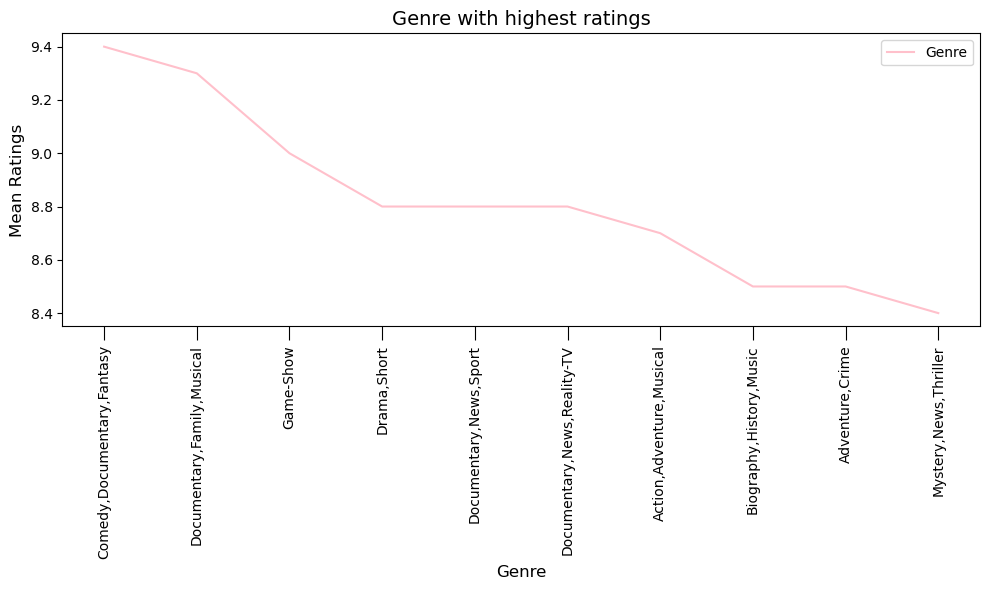

In [86]:
# set up plots
fig, ax = plt.subplots(figsize=(10,6))

genre = basics_and_ratings.groupby('genres')
# created mean_ratings and sorted from largest to smallest
mean_ratings = genre['averagerating'].mean().sort_values(ascending=False)

# convert the mean_ratings to a DataFrame
mean_ratings_df = pd.DataFrame(mean_ratings)
mean_ratings_df
# making "genre" a column
mean_ratings_df = mean_ratings_df.reset_index()
mean_ratings_df

ax.plot(mean_ratings_df['genres'].values[:10], mean_ratings_df['averagerating'].values[:10], color='pink')
# set the respective lables
ax.set_title('Genre with highest ratings',size=14)
ax.set_xlabel('Genre', size=12)
ax.set_ylabel('Mean Ratings', size=12)

ax.legend(['Genre'])

# rotate the x-axis label for better readability
ax.tick_params(axis = 'x', rotation = 90, size=10)

# adjusting the spacing between subplots
plt.tight_layout();